FONTE: https://www.kaggle.com/zalando-research/fashionmnist

### Dataset
Fashion-MNIST é um conjunto de dados das imagens dos artigos de Zalando - consistindo em um conjunto de treinamento de 60.000 exemplos e um conjunto de testes de 10.000 exemplos. Cada exemplo é uma imagem em escala de cinza de 28 x 28, associada a um rótulo de 10 classes. Zalando pretende que o Fashion-MNIST sirva como substituto direto do conjunto de dados MNIST original para algoritmos de aprendizado de máquina de benchmarking. Ele compartilha o mesmo tamanho de imagem e estrutura de divisões de treinamento e teste.

O conjunto de dados MNIST original contém muitos dígitos manuscritos. Os membros da comunidade de AI / ML / Ciência de dados amam esse conjunto de dados e o usam como referência para validar seus algoritmos. De fato, o MNIST é frequentemente o primeiro grupo de dados que os pesquisadores tentam. "Se não funcionar no MNIST, não funcionará", disseram eles. "Bem, se funcionar no MNIST, ainda poderá falhar nos outros."

Zalando procura substituir o conjunto de dados MNIST original

### Conteúdo
Cada imagem tem 28 pixels de altura e 28 pixels de largura, totalizando 784 pixels no total. Cada pixel tem um único valor de pixel associado, indicando a claridade ou a escuridão desse pixel, com números mais altos significando mais escuros. Esse valor de pixel é um número inteiro entre 0 e 255. Os conjuntos de dados de treinamento e teste possuem 785 colunas. A primeira coluna consiste nos rótulos das classes (veja acima) e representa o artigo de vestuário. O restante das colunas contém os valores de pixel da imagem associada.

Para localizar um pixel na imagem, suponha que decompusemos x como x = i * 28 + j, onde i e j são números inteiros entre 0 e 27. O pixel está localizado na linha i e na coluna j de uma matriz 28 x 28 .
Por exemplo, pixel31 indica o pixel que está na quarta coluna da esquerda e a segunda linha da parte superior, como no diagrama ascii abaixo.

Cada exemplo de treinamento e teste é atribuído a um dos seguintes rótulos:

0 Camiseta / top

1 calça

2 Pulôver

3 Vestido

4 Casaco

5 Sandália

6 Camisa

7 Sapatilha

8 Bag

9 Bota no tornozelo

TL; DR

Cada linha é uma imagem separada.
A coluna 1 é o rótulo da classe.
As colunas restantes são números de pixels (784 no total).
Cada valor é a "escuridão" do pixel (1 a 255)

In [1]:
import pandas as pd

In [2]:
data_train = pd.read_csv('fashionmnist/fashion-mnist_train.csv')

In [3]:
data_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

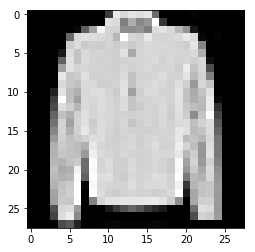

In [5]:
# Imprimindo um objeto do dataset
plt.imshow(data_train.values[8][1:].reshape(28,28), cmap='gray', interpolation='none')
plt.show()

In [6]:
data_train.shape

(60000, 785)

### A atividade consiste em utilizar o KNN para classificar as imagens do fmnist

In [7]:
# features (X) é o conjunto de atributos que descrevem os detalhes do objeto
# label (Y) é a classificação do objeto

X = data_train.values[:,1:];
y = data_train.values[:,0];

In [9]:
y.shape

(60000,)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
import numpy as np

In [13]:
from sklearn import metrics

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
data_train.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [16]:
(trainData, testData, trainLabels, testLabels) = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels, test_size=0.1, random_state=84)

In [18]:
kVals = range(1,6)

In [19]:
accuracies = []

In [20]:
for k in kVals:
    model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    
    model.fit(trainData, trainLabels)
    
    predicted = model.predict(testData)
    
    accuracies.append(model.score(valData, valLabels))

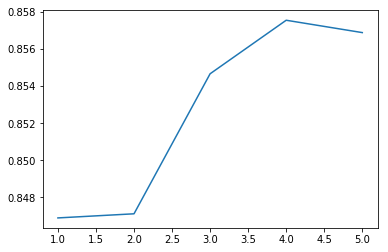

In [21]:
%matplotlib inline

plt.plot(kVals, accuracies)

In [22]:
accuracies[4]

0.8568888888888889

In [23]:
# CONFUSION_MATRIX
from sklearn.metrics import confusion_matrix

modelk = KNeighborsClassifier(n_neighbors=4, metric='euclidean')
modelk = model.fit(trainData, trainLabels)

modely =  modelk.predict(trainData)

confusion_matrix(trainLabels, modely)

array([[3697,    3,   54,   59,   13,    0,  190,    1,   29,    0],
       [  19, 3989,   16,   49,    4,    0,   10,    0,    0,    1],
       [  63,    2, 3529,   26,  276,    0,  160,    1,    5,    1],
       [ 147,   15,   33, 3613,   94,    0,   62,    0,    5,    1],
       [  21,    6,  329,   85, 3422,    0,  215,    0,    4,    0],
       [   4,    0,    1,    1,    2, 3603,   13,  288,    7,  198],
       [ 547,    4,  452,   60,  231,    0, 2697,    0,   28,    0],
       [   0,    0,    0,    0,    0,    6,    0, 3799,    0,  152],
       [  15,    0,   54,   16,   24,    3,   44,   16, 3910,    7],
       [   0,    0,    1,    1,    0,    2,    3,   92,    1, 3969]])

In [24]:
# ACCURACY_SCORE

from sklearn.metrics import accuracy_score

accuracy_score(trainLabels, modely)

0.8945185185185185

In [25]:
accuracy_score(trainLabels, modely, normalize=False)

36228

In [26]:
# F1_SCORE

from sklearn.metrics import f1_score
f1_score(trainLabels, modely, average='macro')

0.8937009499969578

In [27]:
f1_score(trainLabels, modely, average='micro')

0.8945185185185185

In [28]:
f1_score(trainLabels, modely, average='weighted')

0.893877755115207

In [29]:
f1_score(trainLabels, modely, average=None)

array([0.86388597, 0.98408783, 0.82723863, 0.91700508, 0.83996073,
       0.93209158, 0.72764063, 0.93181261, 0.9680614 , 0.94522505])